In [19]:
import re

# Python package to auto-adjust text positions: https://adjusttext.readthedocs.io/en/latest/
from adjustText import adjust_text
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


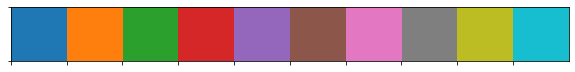

In [27]:
sns.palplot(sns.color_palette())

In [11]:
outdir_gdrive = '/home/olga/googledrive/TabulaMicrocebus/data/cross-species/correlation'
outdir_local = '/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/correlation'
outdirs = outdir_local, outdir_gdrive
for d in outdirs:
    ! mkdir -p $d
!ls -lha $outdir_local

total 6.7M
drwxr-xr-x  2 olga czb 4.0K Jun  2 17:56 .
drwxrwxr-x 14 olga czb 8.0K May 26 08:39 ..
-rw-r--r--  1 olga czb 6.2M Jun  2 18:00 cross_species_median_diffs_tidy.csv
-rw-r--r--  1 olga czb 449K Jun  2 18:00 cross_species_median_diffs_tidy.parquet


In [12]:
medians_tidy = pd.read_csv(f'{outdir_local}/cross_species_median_diffs_tidy.csv')
print(medians_tidy.shape)
medians_tidy.head()

(119878, 8)


,compartment_narrow,gene_name,human_median,diff_lemur_mouse,diff_lemur_mouse_sqrt,human_median_sqrt,diff_lemur_mouse_log,human_median_log
0,endothelial - Capillary,ISG15,1.0,0.0,0.0,1.0,NaN,0.0
1,endothelial - Capillary,AGRN,0.0,0.0,0.0,0.0,NaN,NaN
2,endothelial - Capillary,TTLL10,0.0,0.0,0.0,0.0,NaN,NaN
3,endothelial - Capillary,TNFRSF18,0.0,0.0,0.0,0.0,NaN,NaN
4,endothelial - Capillary,TNFRSF4,0.0,0.0,0.0,0.0,NaN,NaN


In [13]:
medians_tidy.shape

(119878, 8)

In [14]:
for d in outdirs:
    medians_tidy.to_parquet(f'{d}/cross_species_median_diffs_tidy.parquet', index=False)
    medians_tidy.to_csv(f'{d}/cross_species_median_diffs_tidy.csv', index=False)

In [15]:
re.match(r'RPS.+', 'RPL13')

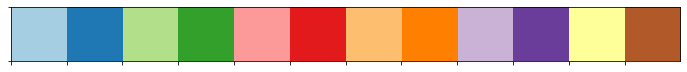

In [26]:
paired = sns.color_palette('Paired')
sns.palplot(paired)

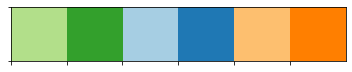

In [34]:
# human is green
human_paired = colors[2:4]
# mouse is blue
mouse_paired = colors[:2]
# lemur is orange
lemur_paired = colors[6:8]

species_paired = human_paired + mouse_paired + lemur_paired
sns.palplot(species_paired)

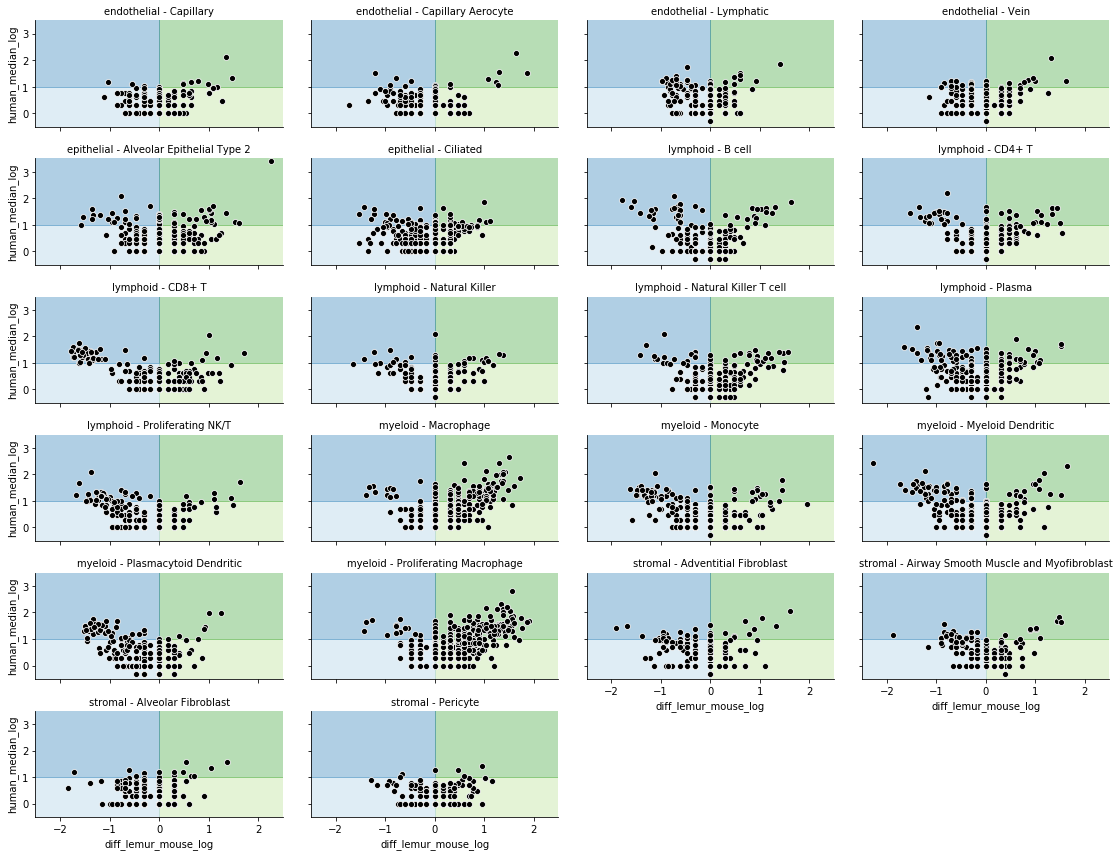

In [39]:
genes_to_ignore = r'RPS.+', r'RPL.+', 'ACTB'

def annotate(xs, ys, gene_names, xmin=0, ymin=1, **kwargs):
#     print(f'args: {args}')
#     print(f'kwargs: {kwargs}')
    mask_x = xs > xmin
    mask_y = ys > ymin
    mask = mask_x & mask_y
    print(mask.sum())
    ax = plt.gca()
    
    texts = []
    for x, y, gene_name in zip(xs[mask], ys[mask], gene_names[mask]):
        # Ignore some genes
        if any(re.match(x, gene_name) for x in genes_to_ignore):
            continue
        
        text = ax.annotate(
            gene_name, 
            xy=(x, y), xycoords='data',
            xytext=(5, 5), textcoords='offset points',
            arrowprops=dict(arrowstyle='-', connectionstyle='arc3')
        )
        texts.append(text)
        
    adjust_text(texts, xs.values, ys.values)
    


g = sns.FacetGrid(data=medians_tidy, col='compartment_narrow', 
                  col_wrap=4, aspect=2, height=2)
g.map(sns.scatterplot, 'diff_lemur_mouse_log', 'human_median_log', color='k')


# g.set(ylim=(0, 25))
xmax = 3
fill_xs = [
    [0, 0, xmax, xmax],
    [0, 0, xmax, xmax],
    [0, 0, -xmax, -xmax],
    [0, 0, -xmax, -xmax],
]
fill_ys = [
    [1, -1, -1, 1],
    [1, 4, 4, 1],
    [1, -1, -1, 1],
    [1, 4, 4, 1],
]

paired_colors = human_paired + mouse_paired

for ax in g.axes.flat:
    for color, x, y in zip(paired_colors, fill_xs, fill_ys):
        ax.fill(x, y, color=color, alpha=0.35, zorder=-1)
g.set(ylim=(-.5, 3.5), xlim=(-2.5, 2.5))
# g.map(annotate, 'diff_lemur_mouse_log', 'human_median_log', 'gene_name')
g.set_titles('{col_name}')

g.fig.tight_layout(h_pad=0, w_pad=0)